# Schrodinger Solver

In [1]:
%matplotlib notebook
import sys
ver=sys.version_info.major
if ver==2:
    from utils2 import *
elif ver==3:
    from utils3 import *
else:
    print("Python version not recognized. Python 2.5 or greater required.")
import numpy as np

## Note about units
We will be using atomic units throughout.

In [2]:
# atomic units
hbar=1.0
m=1.0
#set precision of numerical approximation
steps=2000

## Particle in a double finite well (equal depth)


*******************************************************************************
                           Schrodinger Solver Output
                        Matthew Srnec and Shiv Upadhyay
*******************************************************************************
                Particle in a double finite well (equal depth)

		Input:
                               Well Widths : 1.0
                              Well Depths : 60.0
                             Well Separation : 0.6

		8 lowest Bound States:
                              E(0)=-56.477902007
                              E(1)=-56.4744520017
                              E(2)=-46.0606159808
                              E(3)=-46.0380309139
                              E(4)=-29.3454370888
                              E(5)=-29.2227265947
                              E(6)=-8.48157634996
                              E(7)=-7.64923576141
*******************************************************************************



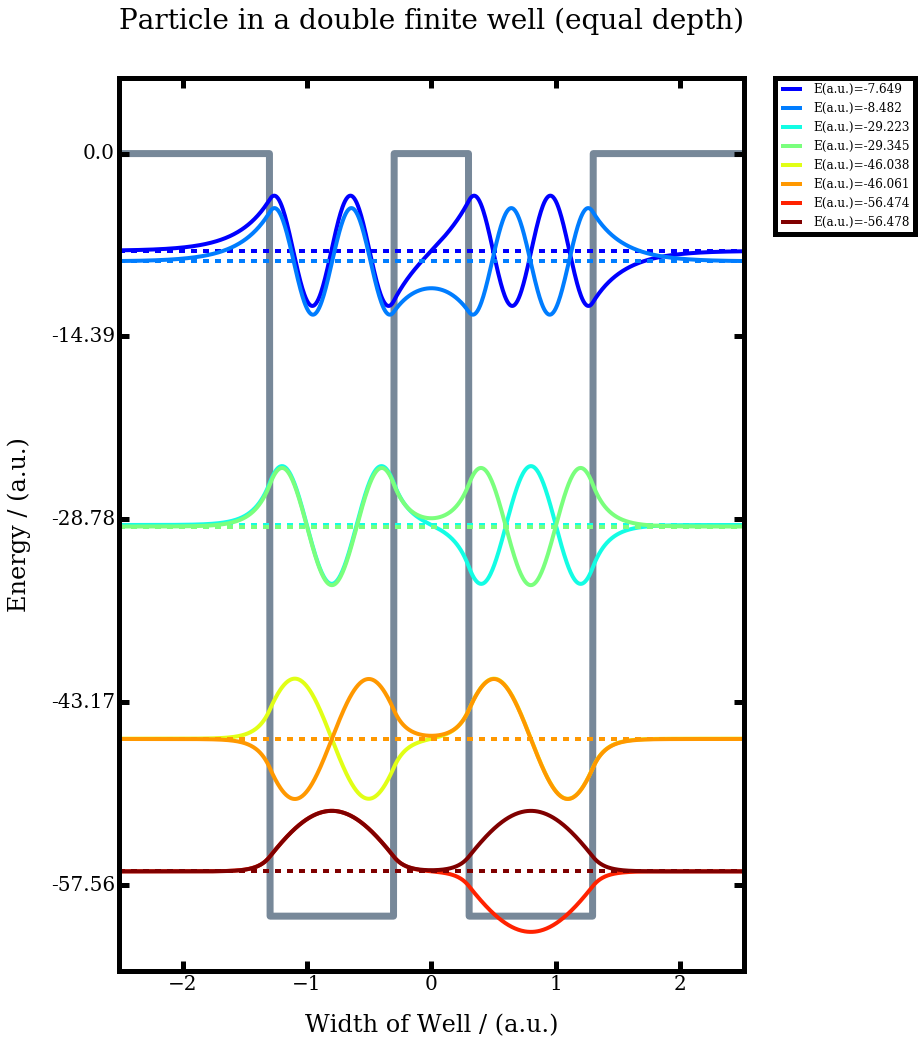

In [3]:
########
# PARTICLE IN A DOUBLE FINITE WELL OF WIDTH (W), DISTANCE (B) APART, AND WELLS OF EQUAL DEPTH (D)
########
Case=3
########
# INPUT
########
#set depths and widths of wells and the well separation
W=1.0 # this value must be between 0.5  and 10
D=60.0 # this value must be between 30 and 500
B=0.6 # this value must be between 0.1 and 10
########
# CODE
########
# set length variable for xvec
A=2.0*((2*W)+B)
# divide by two so a separation from -B to B is of input size
B=B/2.0
# create x-vector from -A to A
xvec=np.linspace(-A,A,steps,dtype=np.float_)
# get step size
h=xvec[1]-xvec[0]
# create the potential from step function
U=-D*(step_func(xvec+W+B)-step_func(xvec+B)+\
    step_func(xvec-B)-step_func(xvec-W-B))
# create Laplacian via 3-point finite-difference method
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)\
    +np.diag(np.ones(steps-1),-1))/(float)(h**2)
# create the Hamiltonian
Hamiltonian=np.zeros((steps,steps))
[i,j]=np.indices(Hamiltonian.shape)
Hamiltonian[i==j]=U
Hamiltonian+=(-0.5)*((hbar**2)/m)*Laplacian
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E,V=diagonalize_hamiltonian(Hamiltonian)
# determine number of energy levels to plot (n)
n=0
while E[n]<0:
    n+=1
# print output
output(Case,['Well Widths','Well Depths','Well Separation'],[W,D,B*2],E,n)
# create plot
finite_well_plot(E,V,xvec,steps,n,Case,U)